# MACROECONOMICS PROBLEM SET 4
## Qingyang Han

## Part One a) i. to vi. Please see pdf.

## Part One a) v.

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt

# The first step is to be able to bring things in from different directories
import sys 
import os

sys.path.insert(0, os.path.abspath('../lib'))

import numpy as np
import HARK 
from time import clock
from copy import deepcopy
mystr = lambda number : "{:.4f}".format(number)
from HARK.utilities import plotFuncs

# These last two will make our charts look nice
plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('Dark2')

In [19]:
# Import the machinery for solving the perfect foresight model and the default parameters

from HARK.ConsumptionSaving.ConsIndShockModel import PerfForesightConsumerType # Import the consumer type
import HARK.ConsumptionSaving.ConsumerParameters as Params # Import default parameters

# Now extract the default values of the parameters of interest

CRRA       = Params.CRRA 
Rfree      = Params.Rfree 
DiscFac    = Params.DiscFac
PermGroFac = Params.PermGroFac
rfree      = Rfree-1

In [20]:
# Now create a perfect foresight consumer example
PFagent = PerfForesightConsumerType(**Params.init_perfect_foresight)
PFagent.cycles = 0 # We need the consumer to be infinitely lived
PFagent.LivPrb = [1.0] # Suppress the possibility of dying

# Solve the agent's problem
PFagent.solve()

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt

import sys 
import os
sys.path.insert(0, os.path.abspath('../lib'))

import numpy as np
import HARK # Prevents import error from Demos repo
from time import clock
from copy import deepcopy
mystr = lambda number : "{:.3f}".format(number)

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

from HARK.utilities import plotFuncs
from HARK.ConsumptionSaving.TractableBufferStockModel import TractableConsumerType

a_list=np.linspace(0,10,100)

TBS_dictionary =  {'UnempPrb' : .00625,    # Probability of becoming unemployed
                   'DiscFac' : 0.975,      # Intertemporal discount factor
                   'Rfree' : 1.01,         # Risk-free interest factor on assets
                   'PermGroFac' : 1.0025,  # Permanent income growth factor (uncompensated)
                   'CRRA' : 2.5}           # Coefficient of relative risk aversion
MyTBStype = TractableConsumerType(**TBS_dictionary)


MyTBStype.DiscFac = 0.975
MyTBStype.CRRA = 2.5



MyTBStype.UnempPrb = 0.05

MyTBStype.Rfree = 1.03
Gamma_min = 1.00
Gamma_max = 1.028
Gamma_list = np.linspace(Gamma_min, Gamma_max, 10)
m = np.linspace(mMin,mMax,num=100,endpoint=True)





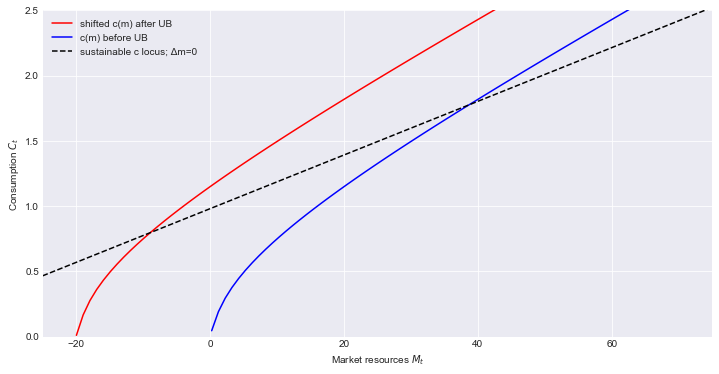

In [25]:
MyTBStype.DiscFac = 0.975
MyTBStype.CRRA = 2.5
MyTBStype.PermGroFac = 1.0025
MyTBStype.UnempPrb = 0.00625
cMin = 0
cMax = 2.5
mMin = -25
mMax = 75
try:
    MyTBStype.solve()
except:
    print('Those parameter values violate a condition required for solution!')    


plt.figure(figsize=((12,6)))
plt.xlabel('Market resources $M_t$')
plt.ylabel('Consumption $C_t$')
plt.ylim([cMin,cMax])
plt.xlim([mMin,mMax])
    
m = np.linspace(mMin,mMax,num=100,endpoint=True)

c_ub = MyTBStype.solution[0].cFunc(m+20)
c_ub[m==0.] = 0.
plt.plot(m,c_ub,'-r',label="shifted c(m) after UB")
c = MyTBStype.solution[0].cFunc(m)
c[m==0.] = 0.
plt.plot(m,c,'-b',label="c(m) before UB")

plt.plot([mMin,mMax],[(MyTBStype.PermGroFacCmp/MyTBStype.Rfree + mMin*(1.0-MyTBStype.PermGroFacCmp/MyTBStype.Rfree)),(MyTBStype.PermGroFacCmp/MyTBStype.Rfree + mMax*(1.0-MyTBStype.PermGroFacCmp/MyTBStype.Rfree))],'--k', label="sustainable c locus; Δm=0")
plt.legend()       
plt.show()


## Part One b) i.

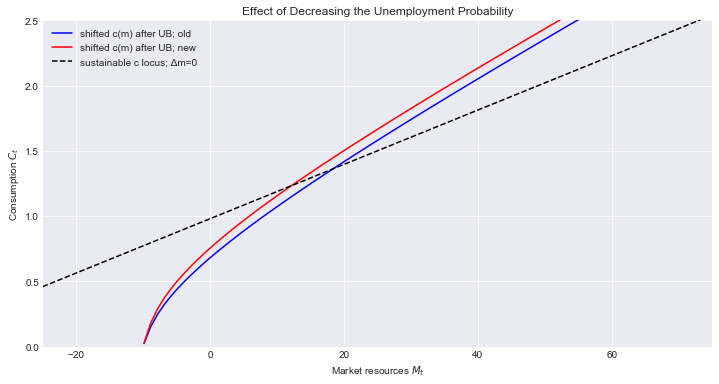

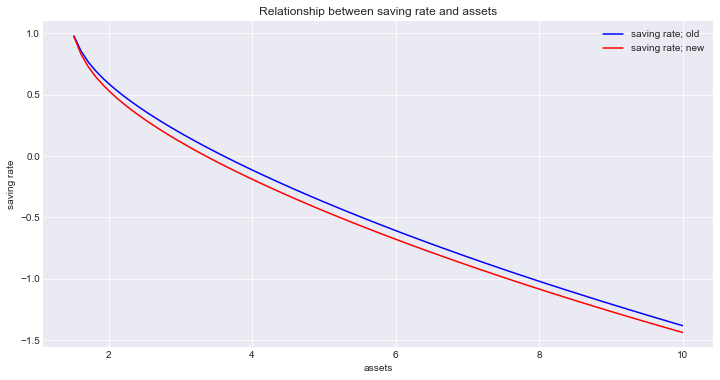

In [43]:
MyTBStype.DiscFac = 0.975
MyTBStype.CRRA = 2.5
MyTBStype.PermGroFac = 1.0025
MyTBStype.UnempPrb = 0.01
cMin = 0
cMax = 2.5
mMin = -25
mMax = 75
try:
    MyTBStype.solve()
except:
    print('Those parameter values violate a condition required for solution!')    


plt.figure(figsize=((12,6)))
plt.xlabel('Market resources $M_t$')
plt.ylabel('Consumption $C_t$')
plt.ylim([cMin,cMax])
plt.xlim([mMin,mMax])
    
m = np.linspace(mMin,mMax,num=100,endpoint=True)

c_ub = MyTBStype.solution[0].cFunc(m+10)
c_ub[m==0.] = 0.
plt.plot(m,c_ub,'-b',label="shifted c(m) after UB; old")

MyTBStype.DiscFac = 0.975
MyTBStype.CRRA = 2.5
MyTBStype.PermGroFac = 1.0025
MyTBStype.UnempPrb = 0.006
try:
    MyTBStype.solve()
except:
    print('Those parameter values violate a condition required for solution!')  

c_ub_new = MyTBStype.solution[0].cFunc(m+10)
c_ub_new[m==0.] = 0.
plt.plot(m,c_ub_new,'-r',label="shifted c(m) after UB; new")


plt.plot([mMin,mMax],[(MyTBStype.PermGroFacCmp/MyTBStype.Rfree + mMin*(1.0-MyTBStype.PermGroFacCmp/MyTBStype.Rfree)),(MyTBStype.PermGroFacCmp/MyTBStype.Rfree + mMax*(1.0-MyTBStype.PermGroFacCmp/MyTBStype.Rfree))],'--k', label="sustainable c locus; Δm=0")
plt.legend()  
plt.title("Effect of Decreasing the Unemployment Probability")
plt.show()

plt.figure(figsize=((12,6)))
savingrate_old = 1-c_ub/(1+rfree*a_list)
savingrate_new = 1-c_ub_new/(1+rfree*a_list)
plt.plot(a_list, savingrate_old, '-b', label='saving rate; old')
plt.plot(a_list, savingrate_new, '-r', label='saving rate; new')
plt.xlabel('assets') # x axis label
plt.ylabel('saving rate') # y axis label
plt.legend()                     # show legend
plt.title('Relationship between saving rate and assets')
plt.show()     


## Part One b) ii.

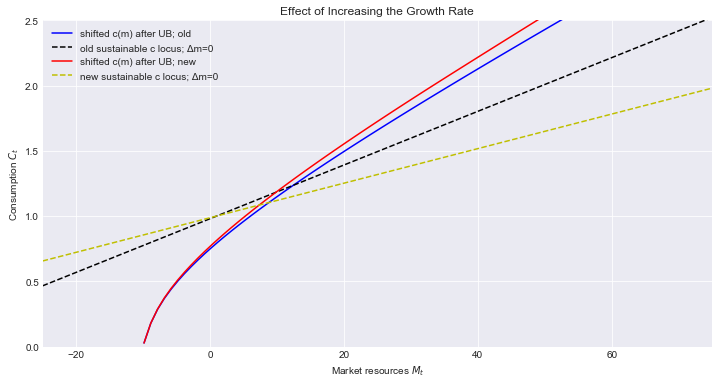

In [44]:
MyTBStype.DiscFac = 0.975
MyTBStype.CRRA = 2.5
MyTBStype.PermGroFac = 1.0025
MyTBStype.UnempPrb = 0.00625
cMin = 0
cMax = 2.5
mMin = -25
mMax = 75
try:
    MyTBStype.solve()
except:
    print('Those parameter values violate a condition required for solution!')    


plt.figure(figsize=((12,6)))
plt.xlabel('Market resources $M_t$')
plt.ylabel('Consumption $C_t$')
plt.ylim([cMin,cMax])
plt.xlim([mMin,mMax])
    
m = np.linspace(mMin,mMax,num=100,endpoint=True)

c_ub = MyTBStype.solution[0].cFunc(m+10)
c_ub[m==0.] = 0.
plt.plot(m,c_ub,'-b',label="shifted c(m) after UB; old")
plt.plot([mMin,mMax],[(MyTBStype.PermGroFacCmp/MyTBStype.Rfree + mMin*(1.0-MyTBStype.PermGroFacCmp/MyTBStype.Rfree)),(MyTBStype.PermGroFacCmp/MyTBStype.Rfree + mMax*(1.0-MyTBStype.PermGroFacCmp/MyTBStype.Rfree))],'--k', label="old sustainable c locus; Δm=0")

MyTBStype.DiscFac = 0.975
MyTBStype.CRRA = 2.5
MyTBStype.PermGroFac = 1.01
MyTBStype.UnempPrb = 0.00625
try:
    MyTBStype.solve()
except:
    print('Those parameter values violate a condition required for solution!')  

c_ub_new = MyTBStype.solution[0].cFunc(m+10)
c_ub_new[m==0.] = 0.
plt.plot(m,c_ub_new,'-r',label="shifted c(m) after UB; new")


plt.plot([mMin,mMax],[(MyTBStype.PermGroFacCmp/MyTBStype.Rfree + mMin*(1.0-MyTBStype.PermGroFacCmp/MyTBStype.Rfree)),(MyTBStype.PermGroFacCmp/MyTBStype.Rfree + mMax*(1.0-MyTBStype.PermGroFacCmp/MyTBStype.Rfree))],'--y', label="new sustainable c locus; Δm=0")
plt.legend()  
plt.title("Effect of Increasing the Growth Rate")
plt.show()

## Part One b) iii.

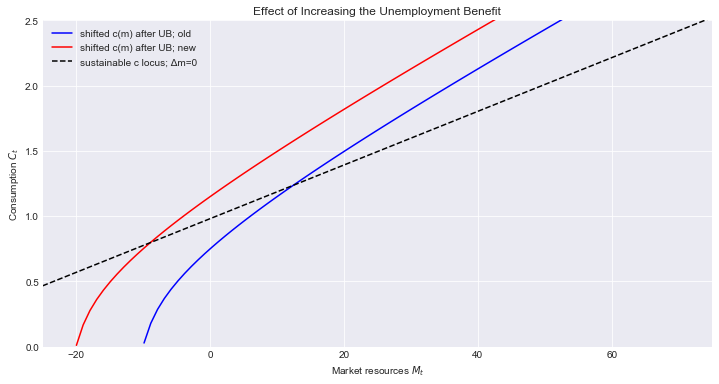

In [39]:
MyTBStype.DiscFac = 0.975
MyTBStype.CRRA = 2.5
MyTBStype.PermGroFac = 1.0025
MyTBStype.UnempPrb = 0.00625
cMin = 0
cMax = 2.5
mMin = -25
mMax = 75
try:
    MyTBStype.solve()
except:
    print('Those parameter values violate a condition required for solution!')    


plt.figure(figsize=((12,6)))
plt.xlabel('Market resources $M_t$')
plt.ylabel('Consumption $C_t$')
plt.ylim([cMin,cMax])
plt.xlim([mMin,mMax])
    
m = np.linspace(mMin,mMax,num=100,endpoint=True)

c_ub = MyTBStype.solution[0].cFunc(m+10)
c_ub[m==0.] = 0.
plt.plot(m,c_ub,'-b',label="shifted c(m) after UB; old")

c_ub_new = MyTBStype.solution[0].cFunc(m+20)
c_ub_new[m==0.] = 0.
plt.plot(m,c_ub_new,'-r',label="shifted c(m) after UB; new")

plt.plot([mMin,mMax],[(MyTBStype.PermGroFacCmp/MyTBStype.Rfree + mMin*(1.0-MyTBStype.PermGroFacCmp/MyTBStype.Rfree)),(MyTBStype.PermGroFacCmp/MyTBStype.Rfree + mMax*(1.0-MyTBStype.PermGroFacCmp/MyTBStype.Rfree))],'--k', label="sustainable c locus; Δm=0")
plt.legend()  
plt.title("Effect of Increasing the Unemployment Benefit")
plt.show()